In [1]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
import  matplotlib
import random
from numpy.linalg import  cholesky
from PIL import Image
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
def LDA(x, y,label1,label2):
    x_1 = np.array([x[i] for i in range(len(x)) if y[i] == label1])
    x_2 = np.array([x[i] for i in range(len(x)) if y[i] == label2])
    mju1 = np.mean(x_1, axis=0)
    mju2 = np.mean(x_2, axis=0)
    sw1 = np.dot((x_1 - mju1).T, (x_1 - mju1)) # 类内里散度矩阵
    sw2 = np.dot((x_2 - mju2).T, (x_2 - mju2))
    sw = sw1 + sw2#类间离散度矩阵
    #print(np.linalg.det(sw))
    w_star = np.dot(np.linalg.inv(sw), (mju1 - mju2))
    w0 = 1/2*(np.dot(w_star.T,mju1) + np.dot(w_star.T,mju2))
    return w_star,w0

In [3]:
def judge(w,w0,samples):
    t=np.dot(w.T,samples)+w0
    if t>0:
        print("第一个人")
        return True
    else:
        print("第二个人")
        return False

In [4]:
samples.shape

NameError: name 'samples' is not defined

In [5]:
def read_image():
    data=[]
    train_data=[]
    train_label=[]
    test_data=[]
    test_label=[]
    path=r'orl_faces\s1'
    allfile=os.listdir(path)
    for i in range(0,8):#前8个作为训练集
        file_path=allfile[i]
        tmpfile_path=path+'\\'+file_path
        im=Image.open(tmpfile_path)#打开图片
        im=im.resize((24,21),Image.ANTIALIAS)#要求的大小（以像素为单位），以二元组表示：（宽度，高度）用于表示改变图像过程用的差值方法
        image_array=np.array(im)#转化为array数组
        image_array=image_array.reshape(1,24*21)
        data.append(image_array[0])
        train_data.append(image_array[0])
        train_label.append(1)#添加标签
    for i in range(8,10):
        file_path=allfile[i]
        tmpfile_path=path+'\\'+file_path
        im=Image.open(tmpfile_path)
        im=im.resize((24,21),Image.ANTIALIAS)#要求的大小（以像素为单位），以二元组表示：（宽度，高度）用于表示改变图像过程用的差值方法
        image_array=np.array(im)#转化为array数组
        image_array=image_array.reshape(1,24*21)
        data.append(image_array[0])
        test_data.append(image_array[0])
        test_label.append(1)
    path=r'orl_faces\s2'
    allfile=os.listdir(path)
    for i in range(0,8):#前8个作为训练集
        file_path=allfile[i]
        tmpfile_path=path+'\\'+file_path
        im=Image.open(tmpfile_path)#打开图片
        im=im.resize((24,21),Image.ANTIALIAS)#要求的大小（以像素为单位），以二元组表示：（宽度，高度）用于表示改变图像过程用的差值方法
        image_array=np.array(im)#转化为array数组
        image_array=image_array.reshape(1,24*21)
        data.append(image_array[0])
        train_data.append(image_array[0])
        train_label.append(0)#添加标签
    for i in range(8,10):
        file_path=allfile[i]
        tmpfile_path=path+'\\'+file_path
        im=Image.open(tmpfile_path)
        im=im.resize((24,21),Image.ANTIALIAS)#要求的大小（以像素为单位），以二元组表示：（宽度，高度）用于表示改变图像过程用的差值方法
        image_array=np.array(im)#转化为array数组
        image_array=image_array.reshape(1,24*21)
        data.append(image_array[0])
        test_data.append(image_array[0])
        test_label.append(0)
    return data,train_data,train_label,test_data,test_label#将所有要分的类 分为train和test，并且保存对应的标签

In [6]:
def draw_line(w,w0):
    w = w.reshape(2,1)
    # 画判别函数
    x1 = -500#左边界w_star[2,0]    
    y1 = - w[0,0] * x1 / w[1,0] + w0/w[1,0]
    x2 = 600#有边界
    y2 = - w[0,0] * x2 / w[1,0] + w0/w[1,0]
    plt.plot([x1, x2], [y1, y2], 'r')



In [13]:
w_star.shape

(2,)

In [7]:
data,train_data,train_label,test_data,test_label=read_image();
pca=PCA(n_components=2)
pca.fit(data)
new_train_data=pca.fit_transform(train_data)
new_test_data=pca.fit_transform(test_data)


In [8]:
new_train_data

array([[  39.5392097 ,  -48.23393704],
       [ 253.41650477,  335.02507101],
       [ 489.35489913,  552.50156784],
       [ 100.18039223,   48.99575378],
       [ 711.94301814, -442.45815878],
       [ 596.4836973 ,  341.77506308],
       [ 527.40509308, -461.26078368],
       [ 327.49970493, -138.96335549],
       [-348.39481593, -132.09781853],
       [-331.08573095,  -72.78278395],
       [-428.58042125,   44.70650403],
       [-408.2191111 ,  -54.48853215],
       [-438.30268631,   56.14758017],
       [-303.63545787,  -59.88205287],
       [-455.53256683,  120.0678003 ],
       [-332.07172904,  -89.05191771]])

In [9]:
new_test_data

array([[ 427.71529601,  327.79844478],
       [ 692.25358885, -285.11725081],
       [-456.86803202,  139.97333227],
       [-663.10085283, -182.65452624]])

第二个人
第二个人
第一个人
第一个人


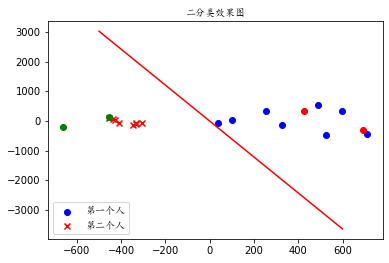

In [13]:
data,train_data,train_label,test_data,test_label=read_image();
pca=PCA(n_components=2)
pca.fit(data)
new_train_data=pca.fit_transform(train_data)
new_test_data=pca.fit_transform(test_data)


w_star,w0=LDA(new_train_data,train_label,0,1)
# print(w_star)
# w0=1/2*(np.dot(w_star.T,mju1)+np.dot(w_star.T,mju2))
draw_line(w_star,w0)



chinese = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')
plt.scatter(new_train_data[:8, 0],new_train_data[:8, 1], color='blue', marker='o', label='第一个人')
plt.scatter(new_train_data[8:, 0],new_train_data[8:, 1], color='red', marker='x', label='第二个人')
plt.title("二分类效果图",font = chinese)
# 画测试集的位置
for samples in new_test_data:
    if judge(w_star,w0,samples):
#         print(samples)
        plt.scatter(samples[0],samples[1], color='green', marker='o')
    else:
        plt.scatter(samples[0],samples[1], color='red', marker='o')
# plt.scatter(samples[0], samples[1], color='green', marker='o',label='待判断')
plt.legend(prop=chinese,loc='lower left')  # 显示中文图例。如果是英文图例，括号里面不加东西
plt.show()
# data1,train_data1,text_data1